In [14]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
# df = pd.read_csv('/content/gurgaon_sectors_coordinates.csv')

In [16]:
# df.head()

,Sector,Coordinates
0,Sector 1,"28.3663° N, 76.9456° E"
1,Sector 2,"28.5095° N, 77.0320° E"
2,Sector 3,"28.4909° N, 77.0176° E"
3,Sector 4,"28.4738° N, 77.0107° E"
4,Sector 5,"28.4794° N, 77.0176° E"


In [73]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [74]:
df.shape

(3554, 18)

In [75]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [29]:
latlong = pd.read_csv('/content/latlong.csv')

In [30]:
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [31]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [32]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [33]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [34]:
new_df = df.merge(latlong,on='sector')

In [35]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3328
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3329 non-null   object 
 1   society          3329 non-null   object 
 2   sector           3329 non-null   object 
 3   price            3329 non-null   float64
 4   price_per_sqft   3329 non-null   float64
 5   bedRoom          3329 non-null   float64
 6   bathroom         3329 non-null   float64
 7   balcony          3329 non-null   object 
 8   floorNum         3329 non-null   float64
 9   agePossession    3329 non-null   object 
 10  built_up_area    3329 non-null   float64
 11  study room       3329 non-null   float64
 12  servant room     3329 non-null   float64
 13  store room       3329 non-null   float64
 14  pooja room       3329 non-null   float64
 15  others           3329 non-null   float64
 16  furnishing_type  3329 non-null   float64
 17  luxury_score  

In [36]:
group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

<ipython-input-36-c837622b372e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]


In [37]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [38]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [39]:
new_df.to_csv('data_viz1.csv',index=False)

In [58]:
new_df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.4160,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.4160,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.4160,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.4160,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.4160,76.9914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,flat,vatika xpressions,sector 88,1.10,8148.0,2.0,4.0,3+,2.0,Under Construction,...,1.0,0.0,0.0,0.0,0.0,0.0,58.0,"28.4220° N, 76.9571° E",28.4220,76.9571
3325,flat,vatika xpressions,sector 88,0.92,7360.0,2.0,2.0,2,3.0,Relatively New,...,0.0,0.0,0.0,1.0,0.0,0.0,174.0,"28.4220° N, 76.9571° E",28.4220,76.9571
3326,flat,vatika xpressions,sector 88,0.92,6815.0,2.0,2.0,3,3.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4220° N, 76.9571° E",28.4220,76.9571
3327,house,independent,sector 27,4.25,31481.0,5.0,5.0,3+,3.0,Relatively New,...,0.0,1.0,0.0,1.0,0.0,1.0,49.0,"28.4658° N, 77.0917° E",28.4658,77.0917


In [42]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [43]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 37C Gurgaon,flat,ild greens,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up...,3,3,3,not available,"Ground Floor, Sector 37C Gurgaon, Gurgaon, Har...",0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi ...","Good location with hospital, school close by.",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'I...","['Green Area5 out of 5', 'Construction5 out of..."
1,3 BHK Flat in Sector 99A Gurgaon,flat,pareena coban residences,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,"Sector 99A Gurgaon, Gurgaon, Haryana",6.0,NaN,0 to 1 Year Old,"['Gopal Super Market', 'Little Need Super Mark...",Newly constructed apartment with all amenities,[],"['Swimming Pool', 'Visitor Parking']","['Environment4 out of 5', 'Lifestyle3 out of 5..."
2,3 BHK Flat in Sector 104 Gurgaon,flat,hero homes,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,"Sector 104 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2024,"['Basai Metro Station', 'HUDA Market', 'Dwarka...",Residential apartment for sell.Located in sect...,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,3 Bedroom House for sale in Sector 26 Gurgaon,house,dlf city phase 1,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,"Sector 26 Gurgaon, Gurgaon, Haryana",2.0,West,10+ Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, e block, dlf phase-1, gurga...","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Private Gard...",NaN
4,2 BHK Flat in Sector 79 Gurgaon,flat,godrej,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,study room,"Sector 79 Gurgaon, Gurgaon, Haryana",3.0,NaN,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road',...","It's a new society, ready to move. Complementa...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area5 out of 5', 'Construction5 out of..."


In [44]:
wordcloud_df = df1.merge(df,left_index=True,right_index=True)[['features','sector']]

In [45]:
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'I...",sector 36
1,"['Swimming Pool', 'Visitor Parking']",sector 89
2,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 92
4,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 102


In [50]:
import streamlit as st

df1 = pd.read_csv("gurgaon_properties.csv")
df = pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]
# Select sector
selected_sector = st.selectbox("Select Sector", df['sector'])

# Filter DataFrame by selected sector
filtered_df = wordcloud_df[wordcloud_df['sector'] == selected_sector]
# print(filtered_df)
# Extract features
features_list = filtered_df['features'].explode().dropna().tolist()

In [51]:
features_list

["['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",
 "['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",
 "['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool

In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [57]:
fig = px.scatter(df,x='built_up_area',y='price',color='bathroom',title='Area vs Price')
fig.show()

In [59]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [62]:
fig = px.pie(df,names='bedRoom',title='Total Bill Amount by Day')
fig.show()

In [64]:
df['sector'].unique().tolist()

['sector 36',
 'sector 89',
 'sohna road',
 'sector 92',
 'sector 102',
 'gwal pahari',
 'sector 108',
 'sector 105',
 'sector 26',
 'sector 109',
 'sector 28',
 'sector 65',
 'sector 12',
 'sector 85',
 'sector 70a',
 'sector 30',
 'sector 107',
 'sector 3',
 'sector 2',
 'sector 41',
 'sector 4',
 'sector 62',
 'sector 49',
 'sector 81',
 'sector 66',
 'sector 86',
 'sector 48',
 'sector 51',
 'sector 37',
 'sector 111',
 'sector 67',
 'sector 113',
 'sector 13',
 'sector 61',
 'sector 69',
 'sector 67a',
 'sector 37d',
 'sector 82',
 'sector 53',
 'sector 74',
 'sector 52',
 'sector 43',
 'sector 14',
 'sector 25',
 'sector 95',
 'sector 56',
 'sector 83',
 'sector 104',
 'sector 88a',
 'sector 55',
 'sector 50',
 'sector 84',
 'sector 91',
 'sector 76',
 'sector 82a',
 'sector 78',
 'manesar',
 'sector 93',
 'sector 7',
 'sector 71',
 'sector 110',
 'sector 33',
 'sector 70',
 'sector 103',
 'sector 90',
 'sector 38',
 'sector 79',
 'sector 112',
 'sector 22',
 'sector 59',
 'secto

In [66]:
temp_df = df[df['bedRoom']<=4]
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


In [67]:
import seaborn as sns

<ipython-input-70-a63e9355a77d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-70-a63e9355a77d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




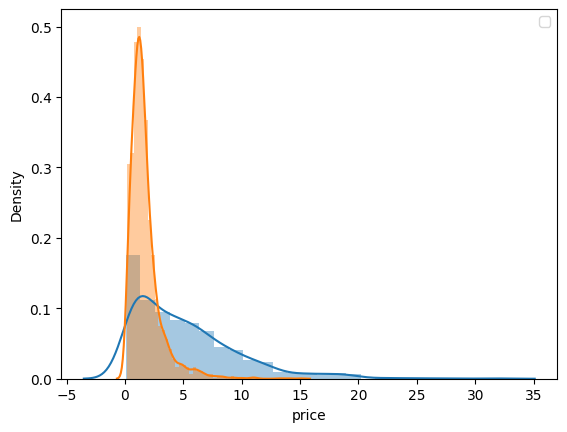

In [70]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])
plt.legend()

In [77]:
# df = px.data.tips()
fig = px.bar(df, x="price", y="sector", orientation='h',

             height=400,
             title='Restaurant bills')
fig.show()